<a href="https://colab.research.google.com/github/vacheharutyunyan/machine-learning-projects/blob/main/Vache_Harutyunyan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

### Get rid of non-numerical columns of the dataset

In [11]:
df = pd.read_csv('Ecommerce.csv')
print(df.dtypes)
df = df.drop(['Email', 'Address', 'Avatar'], axis = 1)
print(df.dtypes)
df.head()

Email                    object
Address                  object
Avatar                   object
Avg Session Length      float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object
Avg Session Length      float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object


,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

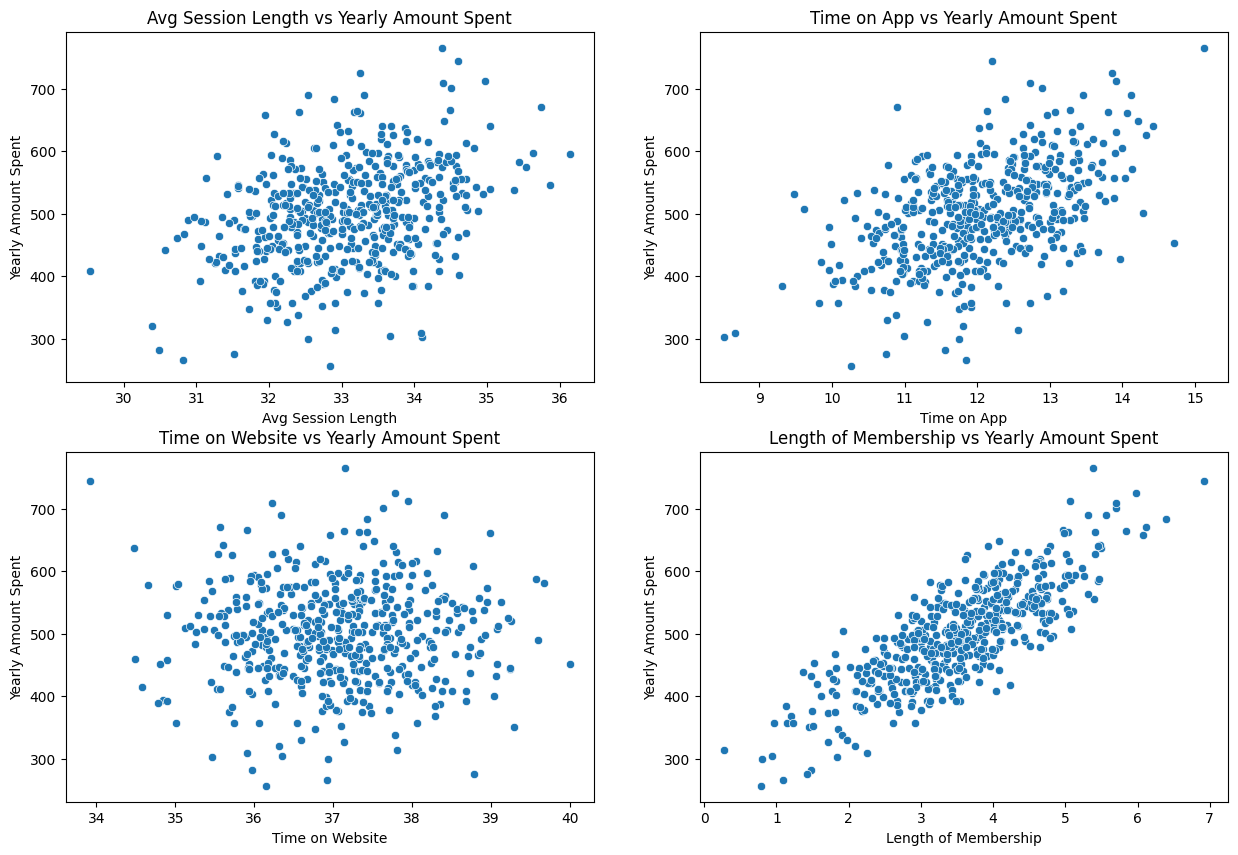

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership']):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=feature, y='Yearly Amount Spent', data=df)
    plt.title(f'{feature} vs {'Yearly Amount Spent'}')


### Leave only one feature that has a linear relationship with the target variable.

In [13]:
df = df.drop(['Avg Session Length', 'Time on App', 'Time on Website'], axis = 1)
df

,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092
...,...,...
495,3.746573,573.847438
496,3.576526,529.049004
497,4.958264,551.620145
498,2.336485,456.469510


### Divide the dataset into training and test sets with the ratio 80:20.

In [14]:
from sklearn.model_selection import train_test_split

X = df['Length of Membership']
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 42)

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope.

In [15]:
import numpy as np

def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """


    X = data_vector.values
    y = response_vector.values
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    w1 = np.sum((X - X_mean) * (y - y_mean))/np.sum((X - X_mean) ** 2)
    w0 = y_mean - w1 * X_mean

    w = np.array([w0, w1])

    return w
w = fit_1d_linear_regression(X, y)

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

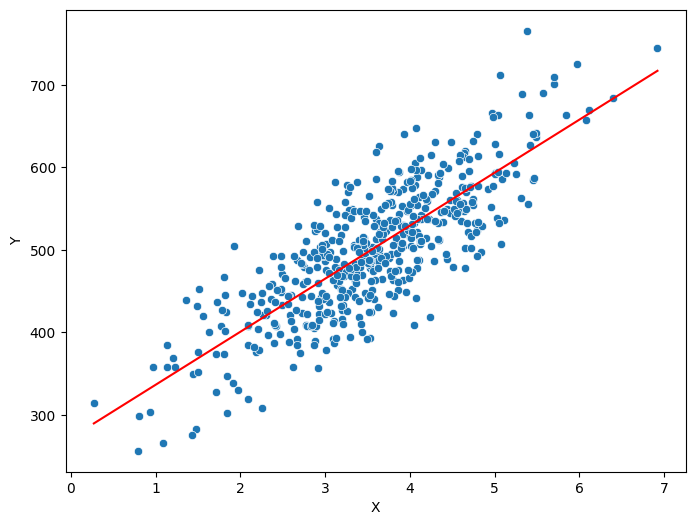

In [16]:
def plot_fitted_line(b0: float,
                     b1: float,
                     x,
                     y,
                     username: str):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    plt.figure(figsize=(8,6))

    sns.scatterplot(x = x, y = y)

    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = b0 + b1 * x_line

    plt.plot(x_line, y_line, color = 'red', label = 'Fitted line')

    plt.xlabel("X")
    plt.ylabel("Y")

plot_fitted_line(w[0], w[1], X, y, '')

### Plot example

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

y_pred = model.predict(X_test.values.reshape(-1, 1))

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

y_pred_my_model = w[0] + w[1] * X_test

print('model_MSE = ', mean_squared_error(y_pred=y_pred, y_true=y_test))
print('my_MSE = ', mean_squared_error(y_pred=y_pred_my_model, y_true=y_test))

print('model_MAE = ', mean_absolute_error(y_pred=y_pred, y_true=y_test))
print('my_MAE = ', mean_absolute_error(y_pred=y_pred_my_model, y_true=y_test))

print('model_RMAE = ', root_mean_squared_error(y_pred=y_pred, y_true=y_test))
print('my_RMAE = ', root_mean_squared_error(y_pred=y_pred_my_model, y_true=y_test))

print('model_R^2 = ', r2_score(y_pred=y_pred, y_true=y_test))
print('my_R^2 = ', r2_score(y_pred=y_pred_my_model, y_true=y_test))

model_MSE =  2245.096668805986
my_MSE =  2201.2011759549846
model_MAE =  37.986226037193084
my_MAE =  37.51850399941782
model_RMAE =  47.382451063721746
my_RMAE =  46.91696042962486
model_R^2 =  0.635584753337965
my_R^2 =  0.6427096968100681


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [19]:
df = pd.read_csv('Ecommerce.csv')
df = df.drop(['Email', 'Address', 'Avatar'], axis = 1)

X = df.drop('Yearly Amount Spent', axis = 1)
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print('model_MSE = ', mean_squared_error(y_pred=y_pred, y_true=y_test))
print('model_MAE = ', mean_absolute_error(y_pred=y_pred, y_true=y_test))
print('model_RMAE = ', root_mean_squared_error(y_pred=y_pred, y_true=y_test))
print('model_R^2 = ', r2_score(y_pred=y_pred, y_true=y_test))

model_MSE =  105.42345346110426
model_MAE =  8.242586001340603
model_RMAE =  10.267592388729904
model_R^2 =  0.9828880803527165


### Evaluate model with K-fold cross-validation.

In [20]:
from sklearn.model_selection import KFold

scores = []
model = LinearRegression()
cv = KFold(n_splits = 10, random_state = 42, shuffle = True)

for train_index, test_index in cv.split(X):

  X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
  model.fit(X_train, y_train)

  scores.append(model.score(X_test, y_test))

scores

[0.9822065535663363,
 0.9725029433171372,
 0.9850962283871815,
 0.9867758547035945,
 0.9857490376506591,
 0.9844541564403605,
 0.9819522399649463,
 0.983749891138895,
 0.9875746703415712,
 0.9831489247534644]

### Implement Ridge Regression, fit the model and evaluate.

In [21]:
def fit_1d_ridge_regression(data_vector, response_vector, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """

    X = data_vector.values
    y = response_vector.values
    x_mean = np.mean(X)
    y_mean = np.mean(y)

    w1 = np.sum((X - x_mean)*(y - y_mean))/(np.sum(((X - x_mean) ** 2)) + lmb)
    w0 = y_mean - w1 * x_mean

    return np.array([w0, w1])

### Implement Lasso regression, fit the model and evaluate.

NOTE: In 1-D, LASSO has a closed form: it takes the ordinary least-squares solution and shrinks it towards zero. If the shrinkage is large enough, it becomes exactly zero.

In [24]:
def fit_1d_lasso_regression(data_vector, response_vector, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """

    X = data_vector.values
    y = response_vector.values
    x_mean = np.mean(X)
    y_mean = np.mean(y)

    z = np.sum((X - x_mean)*(y - y_mean)) / np.sum((X - x_mean) ** 2)

    w1 = np.sign(z) * max([abs(z) - lmb / np.sum((X - x_mean) ** 2), 0])
    w0 = y_mean - w1 * x_mean

    return np.array([w0, w1])

